# Climbing the Empire State

## Introduction

Imagine that you are walking up the Empire State building and playing a game with a friend: You throw a dice 100 times. Depending on the outcome you:

* 1/2 : go one step down
* 3/4/5: go one step up
* 6: throw again and go up the resulting number of steps

There are two additional considerations:
* You cannot go lower than step 0
* You have a chance of 0.1% of falling down and going back to step 0

You bet with your friend that you will reach step 60. What is the chance that you will win this bet?

## Random walk

Your next step will be determined by the outcome of a dice roll, that means you will make a *random movement*. When you follow a succession of random movements, you are following a *random walk*, which is a well-known mathematical object. An example of random walks are the paths followed by molecules in a liquid or a gas.

We will use `random()`, a subpackage of `numpy`, to create the simulation. 

In [1]:
import numpy as np

def simulate_random_walk(n_rolls):
    '''
    Simulates a random walk given a number of dice rolls and returns the outcome. 
    Takes into account that the lower possible step is 0 and that 
    there is a 0.1% chance of falling down and having to start from 0.
    
    Each movement is based in the outcome of a dice roll:
    - 1/2 : go one step down
    - 3/4/5: go one step up
    - 6: throw again and go up the resulting number of steps
    

    Parameters
    ----------
    n_rolls: int
      Number of dice rolls

    Returns
    -------
    random_walk: list
      Final walk. Each element corresponds to the actual step based on the 
      roll outcome and the previous position

    '''
    
    random_walk = [0]
    for n in range(n_rolls):
        # Take as initial position the previous step
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            # Prevent step from being negative
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        # Account for 0.1% chances of falling down    
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    return random_walk


### Visualize the random walk

We use the `matplotlib` package to visualize the random walk, based on the dice roll outcome.

In [11]:
import matplotlib.pyplot as plt

def plot_random_walk(random_walk, minimum):
    '''
    Create a simple line plot from the list that contains the steps
    
    Parameters
    ----------
    random_walk: list
      Each element corresponds to each step from each dice roll.
    minimum: int
      Minimum step to reach at the end

    '''
    
    plt.plot(random_walk)
    
    # Make the plot readable
    plt.xlabel("Number of dice rolls")
    plt.ylabel("Position")
    plt.title("Random walk")
    plt.axhline(minimum, color='Gray', linestyle='--', linewidth=0.7)
    plt.text(0,minimum*0.93,"Want to have the end point above this mark")
    plt.show()


## Create a distribution

So far we have studied a single random walk. One way to know the probability of reaching step number 60 after 100 dice rolls is to compute the probability analytically. However, what we will do is to generate a set of random walks (pseudoexperiments) to create a distribution of end points. The larger the number of pseudoexperiments, the more accurate the probability will be. 

### Simulate multiple walks

We can use the function that we created above, `simulate_random_walk` to generate a set of pseudoexperiments. We will store the outcomes in a `numpy` array.

In [3]:
def generate_multiple_walks(n_pseudoexperiments, n_rolls):
    '''
    Generates a number of random walks and stores the outcomes
    as a numpy array. It uses the function simulate_random_walk
    
    Parameters
    ----------
    n_pseudoexperiments: int
      Number of pseudoexperiments
    n_rolls: int
      Number of dice rolls

    Returns
    -------
    all_random_walk: 2d-numpy array
      Each element corresponds to one complete random walk
    ends: numpy array
       Each element corresponds to the end-point of a random walk

    '''
    
    # Generate the set of random walks
    all_walks = []
    for i in range(n_pseudoexperiments):
        random_walk = simulate_random_walk(n_rolls)
        # Create a list of lists
        all_walks.append(random_walk)

    # Transform all walks into a 2d-numpy array and transpose it
    all_walks_np = np.array(all_walks)
    all_walks_np_t = np.transpose(all_walks_np)

    # Select last row from all_walks_np_t
    ends = all_walks_np_t[-1,:]
    
    return all_walks_np_t, ends


### Compute the probability

Finally, we calculate the probability to reach at least step number 60 by the 100 dice roll. 

In [4]:
def compute_probability(ends,n_pseudoexperiments, minimum):
    '''
    Compute the probability of reaching at least step 'minimum' after 'n_rolls' dice rolls
    
    Parameters
    ----------
    ends: numpy array
       Each element corresponds to the end-point of a random walk
    n_pseudoexperiments: int
      Number of pseudoexperiments
    minimum: int
      Minimum step to reach at the end
      
    Returns
    -------
    probability: float
        probability of reaching at least step 'minimum' after 'n_rolls' dice rolls

    '''
    probability = (np.count_nonzero(ends >= minimum)/n_pseudoexperiments)*100
    
    return probability

### Visualize the set of random walks

We use the `matplotlib` package to visualize the random walks. We will use a line plot to visualize all the random walks. To see the distribution of end points we will use a histogram.

In [5]:
def plot_multiple_random_walks(all_walks_np_t, minimum):
    '''
    Create multiple lines plot from the array that contains the several random walks
    
    Parameters
    ----------
    all_walks_np_t: 2d-numpy array
      Each element corresponds to one complete random walk
    minimum: int
      Minimum step to reach at the end

    '''
    
    plt.plot(all_walks_np_t)
    
    # Make the plot readable
    plt.xlabel("Number of dice rolls")
    plt.ylabel("Position")
    plt.title("Random walk")
    plt.axhline(minimum, color='Gray', linestyle='--', linewidth=0.7)
    plt.show()

In [6]:
def histogram_endpoints(ends, probability, minimum):
    '''
    Create a histogram from the end points of the set of random walks
    
    Parameters
    ----------
    ends: numpy array
       Each element corresponds to the end-point of a random walk
    minimum: int
      Minimum step to reach at the end

    '''
    __, ax = plt.subplots()
    plt.hist(ends, bins=20)
    
    # Make the plot readable
    plt.xlabel("Final step")
    plt.ylabel("Counts")
    plt.title("Distribution of end points")
    plt.text(0.05,0.8,"Probability: "+ str(probability)+"%", transform=ax.transAxes)
    plt.axvline(minimum, color='Tomato', linestyle='--')
    plt.show()

## Putting everything together

We will now use the above defined functions to solve the problem. The functions have been generalized. That means that they work for any number of dice rolls and any step to reach. 

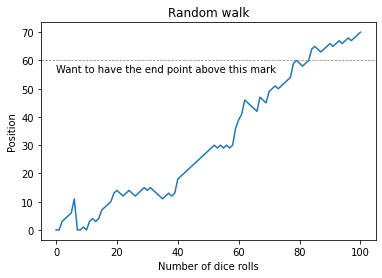

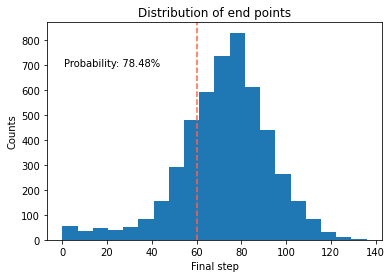

In [12]:
# Input parameters
number_of_dice_rolls = 100
minimum_step = 60
number_of_pseudoexperiments = 5000

# Create one sample random walk and visualize it
walk = simulate_random_walk(number_of_dice_rolls)
plot_random_walk(walk, minimum_step)

# Create an ensemble of random walks
set_of_walks, end_points = generate_multiple_walks(number_of_pseudoexperiments, number_of_dice_rolls)

# Compute the probability of reaching step 'minimum' after 'number_of_dice_rolls' rolls
probability = compute_probability(end_points,number_of_pseudoexperiments, minimum_step)

# Visualise the set of random walks and display the resulting probability
histogram_endpoints(end_points, probability, minimum_step)